In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei']# *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

<font color = "#9bc1b2">月租金（rent）、卧室数（bedroom）、厅数（livingroom）、卫生间数（bathroom）、
租赁面积（area）、租赁房间（room）、所在楼层分组（floor_grp）、邻近地铁（subway）、城区（region）、供暖方式（heating）</font>

In [79]:
df = pd.read_csv("data/data.csv",encoding = "utf-8")
df.head(3)

,rent,bedroom,livingroom,bathroom,area,room,floor_grp,subway,region,heating
0,2730,2,1,1,12,主卧,高楼层,是,通州,集中供暖
1,2740,3,1,1,9,次卧,低楼层,是,昌平,集中供暖
2,2810,3,1,1,14,主卧,低楼层,是,丰台,集中供暖


In [80]:
df.loc[df["subway"] == "是" ,"subway"] = 1
df.loc[df["subway"] == "否" ,"subway"] = 0
df.loc[df["heating"] == "集中供暖" ,"heating"] = 1
df.loc[df["heating"] == "自采暖" ,"heating"] = 0
df[["subway","heating"]] = df[["subway","heating"]].astype(float)
df.head(3)


,rent,bedroom,livingroom,bathroom,area,room,floor_grp,subway,region,heating
0,2730,2,1,1,12,主卧,高楼层,1.0,通州,1.0
1,2740,3,1,1,9,次卧,低楼层,1.0,昌平,1.0
2,2810,3,1,1,14,主卧,低楼层,1.0,丰台,1.0


In [51]:
bar_data = pd.DataFrame(columns=['rent', 'region'])
for i in np.unique(df["region"]):
    temp = pd.Series({'rent' : np.mean(df.loc[df["region"] == i , "rent"]) , 'region' : i})
    bar_data = bar_data.append( temp ,ignore_index=True)

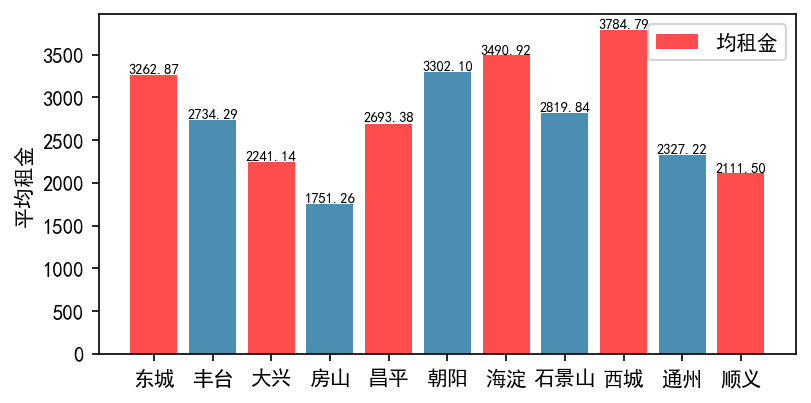

In [63]:

fig, axes = plt.subplots(figsize=(6, 3), dpi=150)
axes.bar(bar_data["region"],bar_data["rent"] ,color = ["red","#005e91"] ,alpha = 0.7 , label = "均租金") # 绘制直方图
for a,b in zip( bar_data["region"] , bar_data["rent"]):
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=7)
axes.set_ylabel("平均租金")
axes.legend()
plt.show()

很明显，不同地区的平均租金差异很大，其中西城的最高，房山的最低，很符合是否靠近北京市中心这一特征。  
那么接下来就针对某一个特定变量对rent做回归，看看那些变量影响房租  
首先进行粗略的检视看看那些变量存在明显相关性  

In [81]:
print(df["rent"].corr(df["bathroom"],method = "pearson"))
print(df["rent"].corr(df["livingroom"],method = "pearson"))
print(df["rent"].corr(df["bedroom"],method = "pearson"))
print(df["rent"].corr(df["area"],method = "pearson"))
print(df["rent"].corr(df["subway"],method = "pearson"))
print(df["rent"].corr(df["heating"],method = "pearson"))

0.028728832477150253
-0.014744508242235322
-0.06734325596792683
0.44378500428947104
0.203766777055728
0.022331883899847752


In [82]:
model1 = smf.ols('rent ~ bedroom + livingroom + bathroom + area ',data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     332.8
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          4.31e-255
Time:                        22:07:31   Log-Likelihood:                -40884.
No. Observations:                5149   AIC:                         8.178e+04
Df Residuals:                    5144   BIC:                         8.181e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1997.8320    106.196     18.813      0.0